In [2]:
import root_pandas as rp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#dataset=rp.read_root("TMVAppValues.root")
dataset=rp.read_root('DataTestmerge.root')
dataset['BDTval']=rp.read_root('TMVAppValues.root')

In [5]:
signal=dataset[dataset['BDTval']>-0.2]

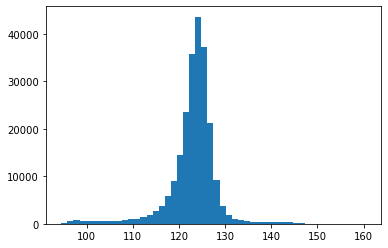

In [6]:
#plt.hist()
plt.hist(signal['FourLepSystemM'],bins=50)
plt.show()
#GRAFICAS A COLOCAR EN LA PRESE
#OBTENIDA DE M
#SUPERPOSICION DE M OBTENIDA CON M SACADA DEL  SIGNAL
#LO MISMO PARA EL PT
#gRAFICA COMPARATIVA DEL PT BCK Y SIG EN BDT


In [26]:
sig=rp.read_root('DataTest.root', 'Signal')
sig['BDTval']=rp.read_root('TMVAppValues.root')
bck=rp.read_root('DataTest.root', 'Background')
#bck['BDTval']=rp.read_root('TMVAppValues.root')

In [34]:
signall=sig[sig['BDTval']>-0.1]
bckk=bck#[bck['BDTval']<-0.1]

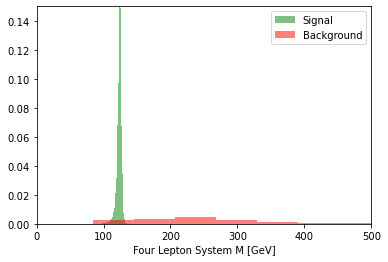

In [41]:
plt.hist(signall['FourLepSystemM'],bins=50,density=1,facecolor='g',alpha=0.5,label='Signal')
plt.hist(bckk['FourLepSystemM'],bins=50,density=1,facecolor='r',alpha=0.5,label='Background')
plt.xlim([0,500])
plt.ylim([0,0.15])
plt.legend(loc='upper right')
plt.xlabel(r'Four Lepton System M [GeV]')
plt.savefig("figure2.png")
plt.show()

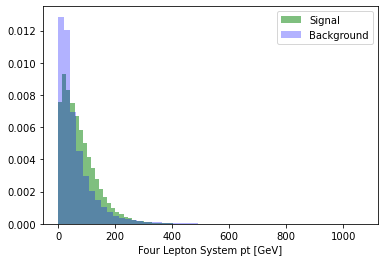

In [18]:
plt.hist(signall['FourLepSystempt'],bins=50,density=1,facecolor='g',alpha=0.5,label='Signal')
plt.hist(bckk['FourLepSystempt'],bins=50,density=1,facecolor='b',alpha=0.3,label='Background')
plt.legend(loc='upper right')
plt.xlabel(r'Four Lepton System pt [GeV]')
plt.savefig("figure1.png")
plt.show()


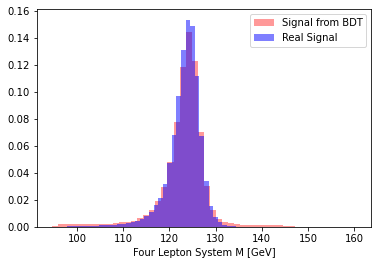

In [50]:
plt.hist(signal['FourLepSystemM'],bins=50,density=1,facecolor='r',alpha=0.4,label='Signal from BDT')
plt.hist(signall['FourLepSystemM'],bins=50,density=1,facecolor='b',alpha=0.5,label='Real Signal')
plt.legend(loc='upper right')
plt.xlabel(r'Four Lepton System M [GeV]')
plt.savefig("figure3.png")
plt.show()

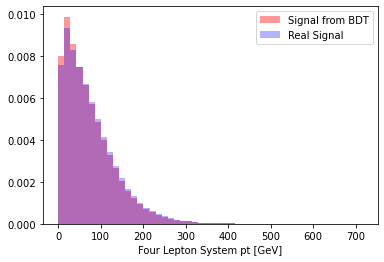

In [52]:
plt.hist(signal['FourLepSystempt'],bins=50,density=1,facecolor='r',alpha=0.4,label='Signal from BDT')
plt.hist(signall['FourLepSystempt'],bins=50,density=1,facecolor='b',alpha=0.3,label='Real Signal')
plt.legend(loc='upper right')
plt.xlabel(r'Four Lepton System pt [GeV]')
plt.savefig("figure4.png")
plt.show()